# Repeatability Analysis: Batch Results

This notebook aggregates and presents the outcomes of our repeatability analysis across multiple image-processing batches (see Appendix C of the paper). Each batch corresponds to an independent rerun of the transient classification pipeline (New, Reference, Difference images) as described in Stoppa & Bulmus et al. (2025). We reconstruct the recorded metrics (accuracy, precision, recall) for the original guide set and five alternative sets, compute per-set means and standard deviations, and produce a segmented bar chart indicating performance relative to the baseline MeerLICHT thresholds:

- **Accuracy threshold:** 0.934  
- **Precision threshold:** 0.877  
- **Recall threshold:** 0.987  

For clarity, the indices of the 15 MeerLICHT images used in each guide set are:

- **Original:**  
  `[0, 1, 3, 4, 8, 48, 77, 592, 685, 1179, 1180, 1181, 1191, 1193, 3216]`

- **Set 1:**  
  `[11, 20, 475, 51, 12, 509, 914, 69, 224, 1186, 1251, 1210, 2349, 2271, 2130]`

- **Set 2:**  
  `[23, 218, 402, 1050, 43, 81, 1001, 126, 309, 1202, 1278, 1246, 2363, 2278, 2434]`

- **Set 3:**  
  `[104, 316, 351, 1085, 222, 452, 501, 178, 2594, 2871, 1277, 2901, 2815, 3187, 2550]`

- **Set 4:**  
  `[1111, 26, 835, 273, 100, 327, 686, 1150, 1012, 2858, 1265, 1261, 2614, 2201, 3217]`

- **Set 5:**  
  `[1031, 219, 1013, 289, 217, 394, 765, 998, 824, 1239, 1277, 1516, 2907, 2801, 3105]`



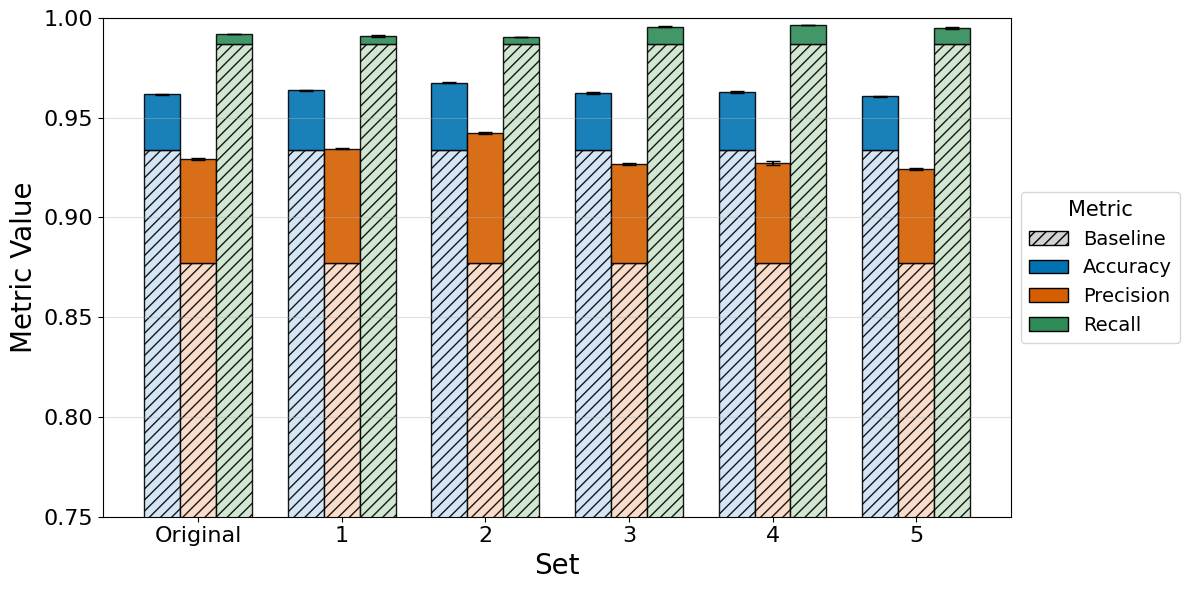

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # Import the patches module

# Reconstruct the original and other sets as provided by the user

# Original set
original_set = [
    (3204, 0.9616104868913857, 0.9289827255278311, 0.9918032786885246),
    (3204, 0.9616104868913857, 0.9289827255278311, 0.9918032786885246),
    (3204, 0.9619225967540574, 0.9296225207933462, 0.9918088737201365),
    (3204, 0.9619225967540574, 0.9296225207933462, 0.9918088737201365),
    (3204, 0.9616104868913857, 0.9289827255278311, 0.9918032786885246),
]
original_df = pd.DataFrame(original_set, columns=["Total", "Accuracy", "Precision", "Recall"])
original_df["Set"] = 0
original_df["Run"] = range(1, 6)

# Other sets
raw_results = {
    1: [
        (3204, 0.9634831460674157, 0.9341010876519513, 0.9905020352781547),
        (3204, 0.964107365792759, 0.9347408829174664, 0.991180461329715),
        (3204, 0.9637952559300874, 0.9341010876519513, 0.991174473862865),
        (3204, 0.964107365792759, 0.9347408829174664, 0.991180461329715),
        (3204, 0.9637952559300874, 0.9347408829174664, 0.9905084745762712),
    ],
    2: [
        (3204, 0.9675405742821473, 0.9424184261036468, 0.9905850706119704),
        (3204, 0.9672284644194756, 0.9417786308381318, 0.990578734858681),
        (3204, 0.9672284644194756, 0.9417786308381318, 0.990578734858681),
        (3204, 0.9675405742821473, 0.9424184261036468, 0.9905850706119704),
        (3204, 0.967852684144819, 0.9430582213691618, 0.9905913978494624),
    ],
    3: [
        (3204, 0.962234706616729, 0.927063339731286, 0.9951923076923077),
        (3204, 0.9628589263420724, 0.927703134996801, 0.9958791208791209),
        (3204, 0.962234706616729, 0.9264235444657709, 0.9958734525447043),
        (3204, 0.9625468164794008, 0.927063339731286, 0.9958762886597938),
        (3204, 0.9619225967540574, 0.925783749200256, 0.9958706125258087),
    ],
    4: [
        (3204, 0.9628589263420724, 0.927063339731286, 0.9965612104539202),
        (3204, 0.9628589263420724, 0.927063339731286, 0.9965612104539202),
        (3204, 0.9634831460674157, 0.9283429302623161, 0.9965659340659341),
        (3204, 0.9631710362047441, 0.927703134996801, 0.9965635738831615),
        (3204, 0.962234706616729, 0.925783749200256, 0.9965564738292011),
    ],
    5: [
        (3204, 0.9609862671660424, 0.9245041586692259, 0.9951790633608816),
        (3204, 0.9606741573033708, 0.9238643634037108, 0.9951757408683667),
        (3204, 0.9606741573033708, 0.9245041586692259, 0.9944941500344116),
        (3204, 0.9609862671660424, 0.9245041586692259, 0.9951790633608816),
        (3204, 0.9606741573033708, 0.9238643634037108, 0.9951757408683667),
    ],
}
df = pd.DataFrame([
    {"Set": set_num, "Run": i + 1, "Total": total, "Accuracy": acc, "Precision": prec, "Recall": rec}
    for set_num, runs in raw_results.items()
    for i, (total, acc, prec, rec) in enumerate(runs)
])

# Combine all sets
full_combined_df = pd.concat([original_df, df], ignore_index=True)

# Recalculate set means and standard deviations
set_stats = full_combined_df.groupby("Set")[["Accuracy", "Precision", "Recall"]].agg(['mean', 'std'])

# Flatten multi-index columns
set_stats.columns = [f"{metric}_{stat}" for metric, stat in set_stats.columns]

# Convert index to string and reorder
set_stats = set_stats.reset_index()
set_stats['Set'] = set_stats['Set'].astype(str)
set_stats = set_stats.set_index('Set').loc[['0', '1', '2', '3', '4', '5']]
set_stats.index = ['Original', '1', '2', '3', '4', '5']

# Extract means and stds
means = set_stats[[col for col in set_stats.columns if 'mean' in col]]
stds = set_stats[[col for col in set_stats.columns if 'std' in col]]

# Prepare data for plotting
labels = means.index.tolist()
accuracy_means = means['Accuracy_mean'].tolist()
precision_means = means['Precision_mean'].tolist()
recall_means = means['Recall_mean'].tolist()

accuracy_stds = stds['Accuracy_std'].tolist()
precision_stds = stds['Precision_std'].tolist()
recall_stds = stds['Recall_std'].tolist()

x = np.arange(len(labels))
width = 0.25

# MeerLICHT thresholds
meerlicht = {
    "Accuracy": 0.934,
    "Precision": 0.877,
    "Recall": 0.987
}

# Colors: solid top, grey bottom
colors = {
    "Accuracy": ("#0072B2", "#d0e4f5"),    # Blue
    "Precision": ("#D55E00", "#f9d9c5"),   # Vermilion
    "Recall": ("seagreen", "#cce5cc")           # tinted green
}

hatch = '///'

# Draw bars with bottom in light grey + hatch and top in colored solid
def draw_segmented_bars(ax, x, means, stds, threshold, width, label, color_top, color_bottom):
    for i, (xi, val, std) in enumerate(zip(x, means, stds)):
        bottom_val = min(val, threshold)
        top_val = max(0, val - threshold)

        # Base segment (≤ threshold): light grey + hatch
        ax.bar(xi, bottom_val, width=width, color=color_bottom, edgecolor='black', hatch=hatch,
               label=f"{label} (≤ threshold)" if i == 0 else "", alpha=0.9)

        # Top segment (> threshold): solid color
        if val > threshold:
            ax.bar(xi, top_val, bottom=threshold, width=width, color=color_top, edgecolor='black',
                   label=f"{label} (> threshold)" if i == 0 else "", alpha=0.9)

        # Error bar at the top
        ax.errorbar(xi, val, yerr=std, fmt='none', ecolor='black', capsize=5)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

draw_segmented_bars(ax, x - width, accuracy_means, accuracy_stds, meerlicht["Accuracy"], width,
                    'Accuracy', colors["Accuracy"][0], colors["Accuracy"][1])
draw_segmented_bars(ax, x, precision_means, precision_stds, meerlicht["Precision"], width,
                    'Precision', colors["Precision"][0], colors["Precision"][1])
draw_segmented_bars(ax, x + width, recall_means, recall_stds, meerlicht["Recall"], width,
                    'Recall', colors["Recall"][0], colors["Recall"][1])

# Final formatting
ax.set_xlabel("Set", fontsize=20)
ax.set_ylabel("Metric Value", fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)
ax.set_ylim(0.75, 1)
ax.tick_params(labelsize=16)
ax.grid(axis='y', alpha=0.4)

# Legend
handles = [
    mpatches.Patch(facecolor='lightgray', edgecolor='black', hatch=hatch, label='Baseline'),
    mpatches.Patch(facecolor=colors["Accuracy"][0], edgecolor='black', label='Accuracy'),
    mpatches.Patch(facecolor=colors["Precision"][0], edgecolor='black', label='Precision'),
    mpatches.Patch(facecolor=colors["Recall"][0], edgecolor='black', label='Recall'),
]
ax.legend(handles=handles, title="Metric", fontsize=14, title_fontsize=15, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('metrics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
